In [21]:
import pandas as pd
import requests

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit


import os
import acquire as a
import prepare as p

#set figure size
plt.rc('figure', figsize=(12, 8))

# Superstore

In [5]:
df = p.get_superstore()
df.head()

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,day_of_week,month,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Tuesday,January,10.92
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Tuesday,January,30.16
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,Tuesday,January,308.48
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Tuesday,January,197.55
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Tuesday,January,25.16



> Train, Test
- using percentage based split

In [6]:
# set train size and parameters
train_size = 0.70 
n = df.shape[0] 
test_start_index = round(train_size * n)

In [7]:
#identify start index
train = df.iloc[:test_start_index] 
test = df.iloc[test_start_index:] 

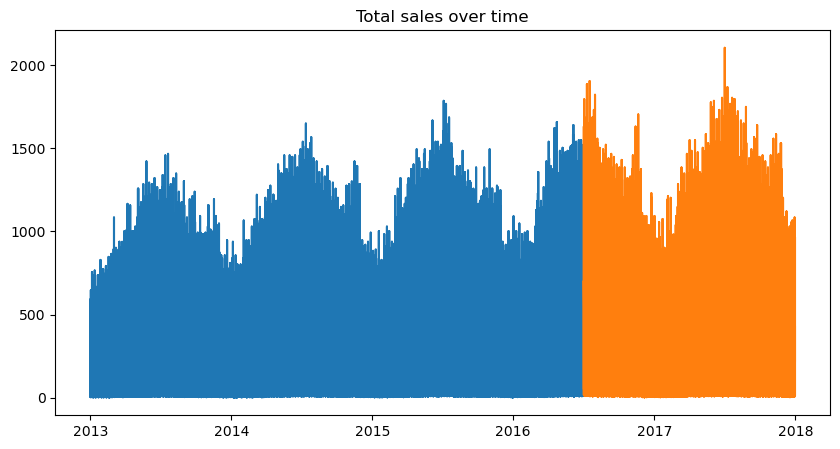

In [8]:
# plot train and test data sets
plt.plot(train.sales_total)
plt.plot(test.sales_total)
plt.title('Total sales over time')
plt.show()

# Target 
- My target variable is total sales

In [9]:
y = train.sales_total
y.head()

sale_date
2013-01-01     10.92
2013-01-01     30.16
2013-01-01    308.48
2013-01-01    197.55
2013-01-01     25.16
Name: sales_total, dtype: float64

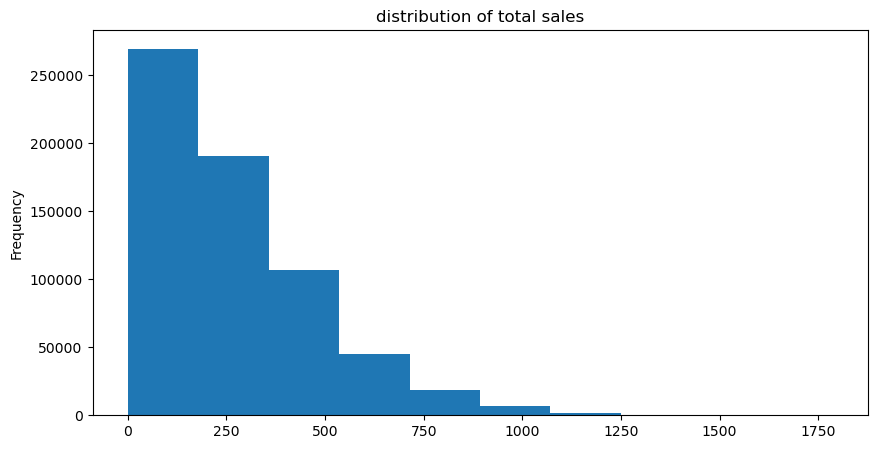

In [10]:
#Distribution of target
train.sales_total.plot.hist()
plt.title('distribution of total sales')
plt.show()

# Blow off time series

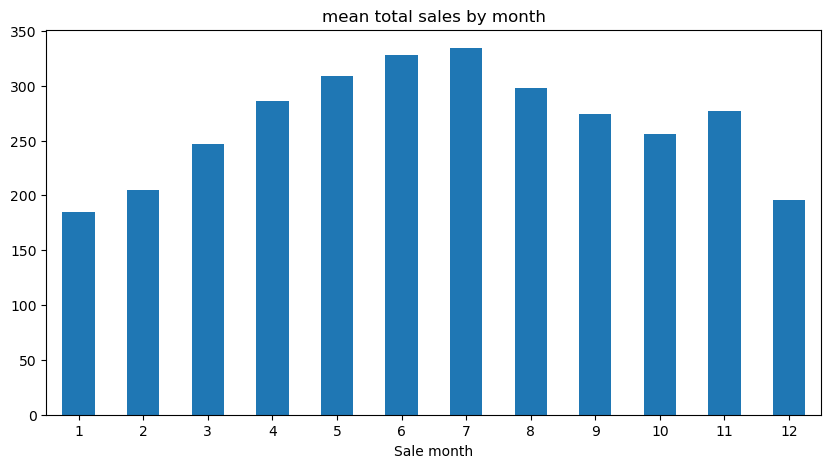

In [11]:
#plot total sales by month
train.groupby(train.index.month).sales_total.mean()\
.plot.bar().tick_params('x', rotation=0)

plt.title('mean total sales by month')
plt.xlabel('Sale month')
plt.show()

# Target over time

In [12]:
#view columns
train.columns

Index(['item', 'sale_amount', 'sale_id', 'store', 'item_brand', 'item_id',
       'item_name', 'item_price', 'item_upc12', 'item_upc14', 'store_address',
       'store_city', 'store_id', 'store_state', 'store_zipcode', 'day_of_week',
       'month', 'sales_total'],
      dtype='object')

In [13]:
y.head()

sale_date
2013-01-01     10.92
2013-01-01     30.16
2013-01-01    308.48
2013-01-01    197.55
2013-01-01     25.16
Name: sales_total, dtype: float64

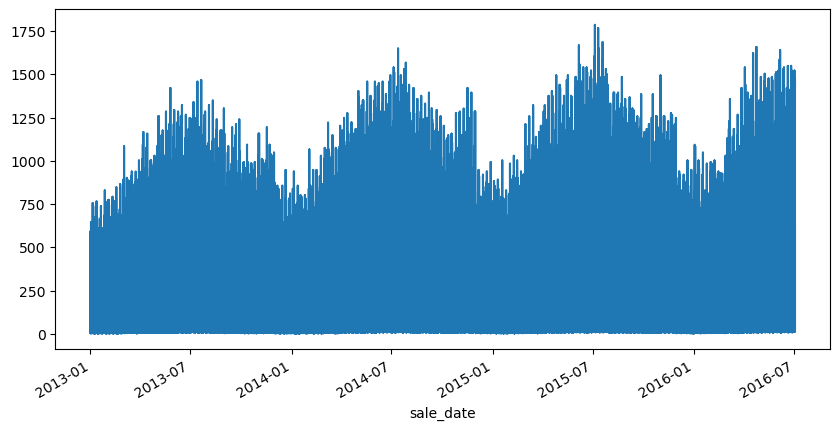

In [14]:
y.plot();

In [15]:
# Target averaged over various periods

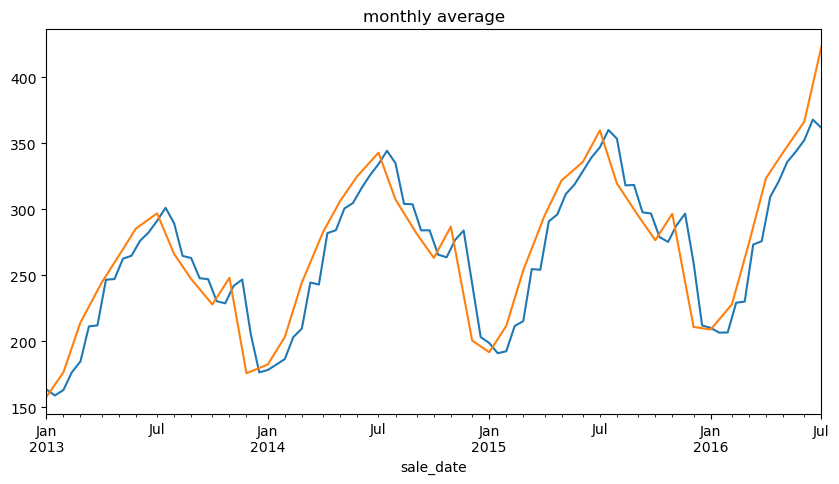

In [16]:
y.resample('2W').mean().plot(title='bi-weekly average')
y.resample('M').mean().plot(title='monthly average');

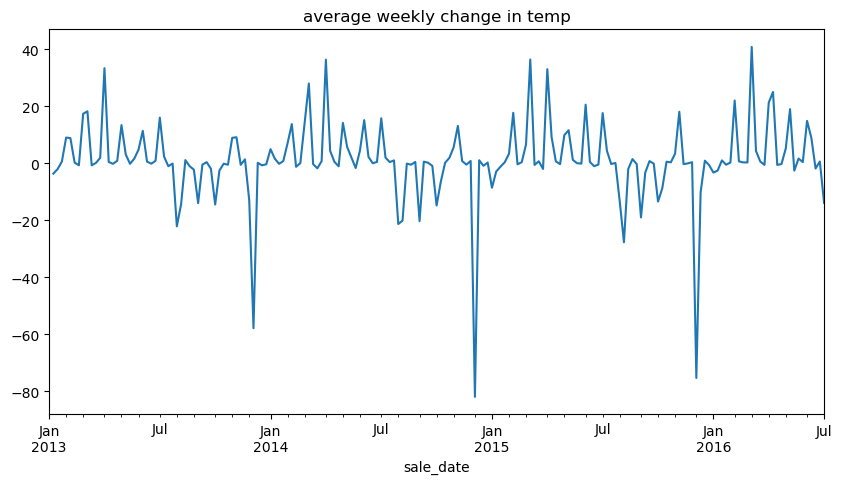

In [17]:
#change in target over time
y.resample('W').mean().diff().plot(title='average weekly change in temp');

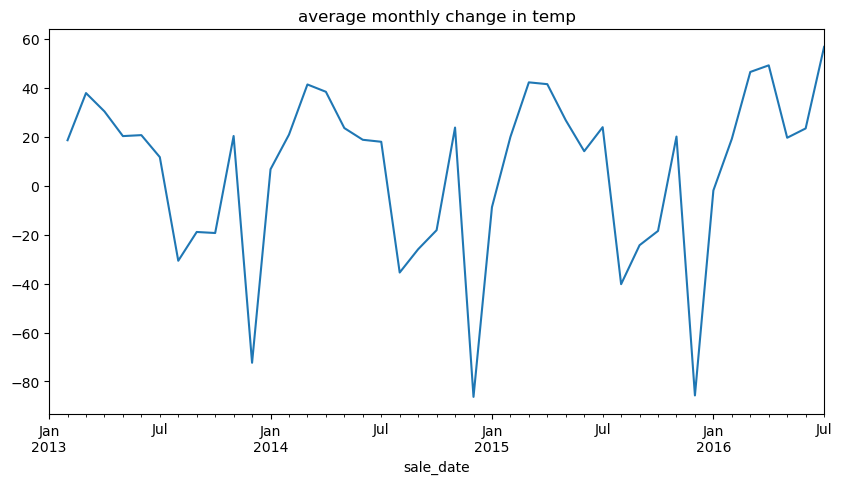

In [18]:
y.resample('M').mean().diff().plot(title='average monthly change in temp');

# Seasonal Subseries Plot

In [19]:
# make my pivot table of years to month with unstack()
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

sale_date,1,2,3,4,5,6,7,8,9,10,11,12
sale_date,,,,,,,,,,,,
2013,157.894723,176.411855,214.181650,244.460082,264.663123,285.261279,296.881241,266.183375,247.237694,227.868064,248.108656,175.753692
2014,182.410791,203.207122,244.488991,282.786091,306.267538,324.965376,342.849100,307.345466,281.350430,263.133772,286.821036,200.538977
2015,191.725206,211.589839,253.739390,295.147608,321.813672,335.850784,359.698008,319.435676,295.088416,276.572155,296.583045,210.886208
2016,208.900519,227.977512,274.367406,323.461873,342.986382,366.316222,422.947300,NaN,NaN,NaN,NaN,NaN


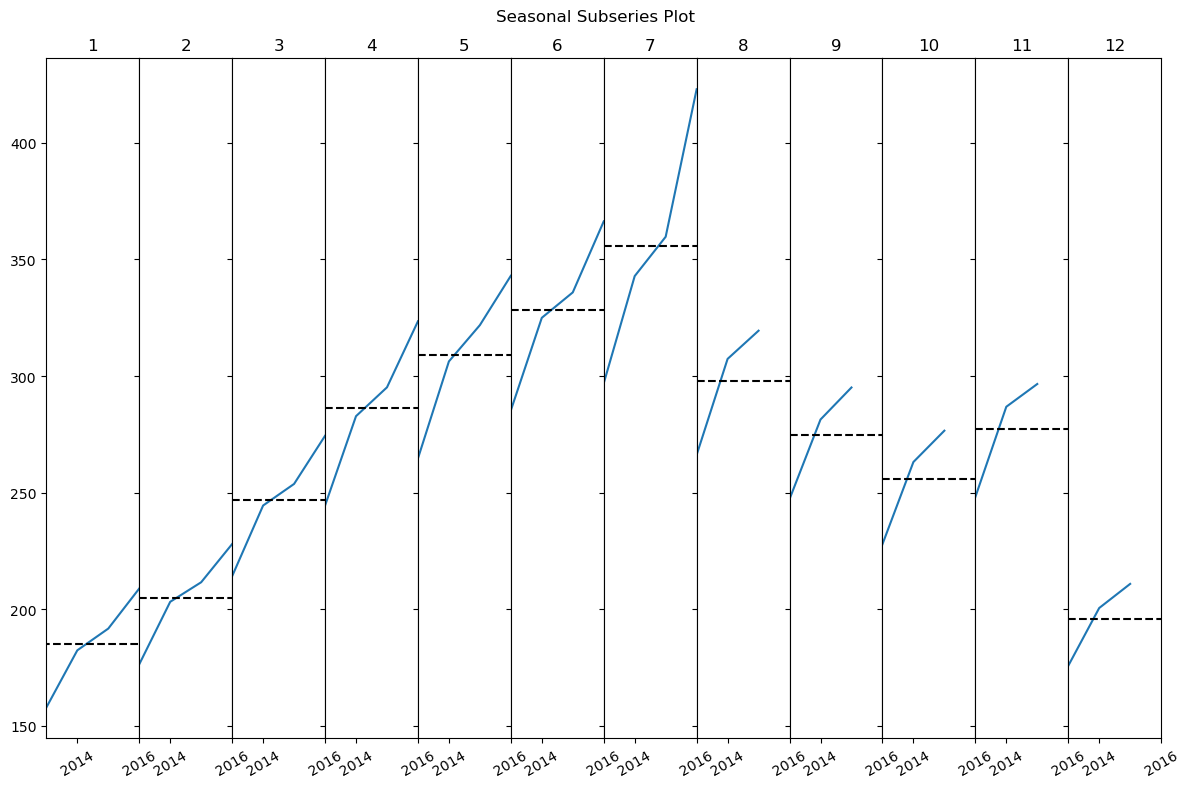

In [22]:
# unpacking my figure and axes elements
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)

# for ax, (month, subset) 
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set_xlim(2013, 2016)
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.tight_layout()
fig.subplots_adjust(wspace=0)

# Autocorrelation

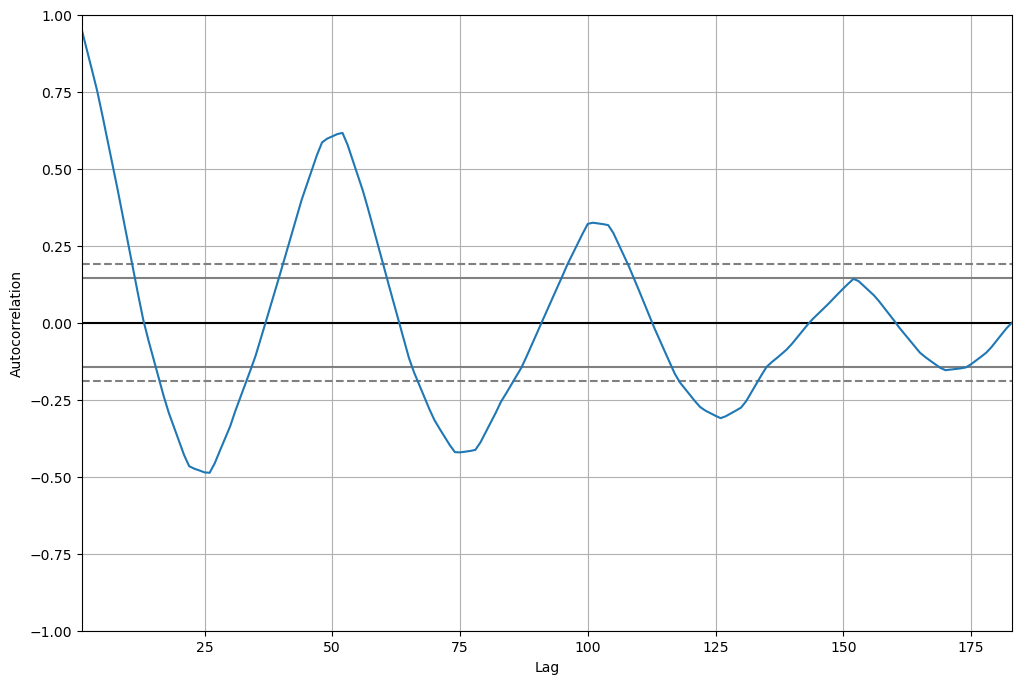

In [23]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())
plt.show()

# Germany

In [24]:
df = p.get_germany()
df.head()

,consumption,wind,solar,wind_solar,month,year,other_energy_sources
date,,,,,,,
2012-01-01,948.128,227.465,6.587,234.052,January,2012,714.076
2012-01-02,1269.581,207.327,6.574,213.901,January,2012,1055.680
2012-01-03,1334.745,473.468,24.679,498.147,January,2012,836.598
2012-01-04,1347.136,499.804,14.681,514.485,January,2012,832.651
2012-01-05,1376.658,523.851,5.071,528.922,January,2012,847.736


> Train, Test

In [25]:
# make the thing
tss = TimeSeriesSplit(n_splits = 5)

- Set the data frame index to be time if it is not so.
- Sort time frame by time: it is important to sort dataframe by time before the time series split
- prepare features dataframe (X) and target (y) as data series

In [26]:
# drop and set target
X = df.drop(labels=['consumption'], axis=1)
y = df['consumption']

In [27]:
#split train test sets for both features and targets
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

- X_test is 'younger'than train... aka... the test data is more recent in observation

In [28]:
#Check out X_train
X_train.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='date', length=1823, freq=None)

In [29]:
# Check out X_test
X_test.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-07', '2017-01-08', '2017-01-09',
               '2017-01-10', '2017-01-11',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='date', length=364, freq=None)

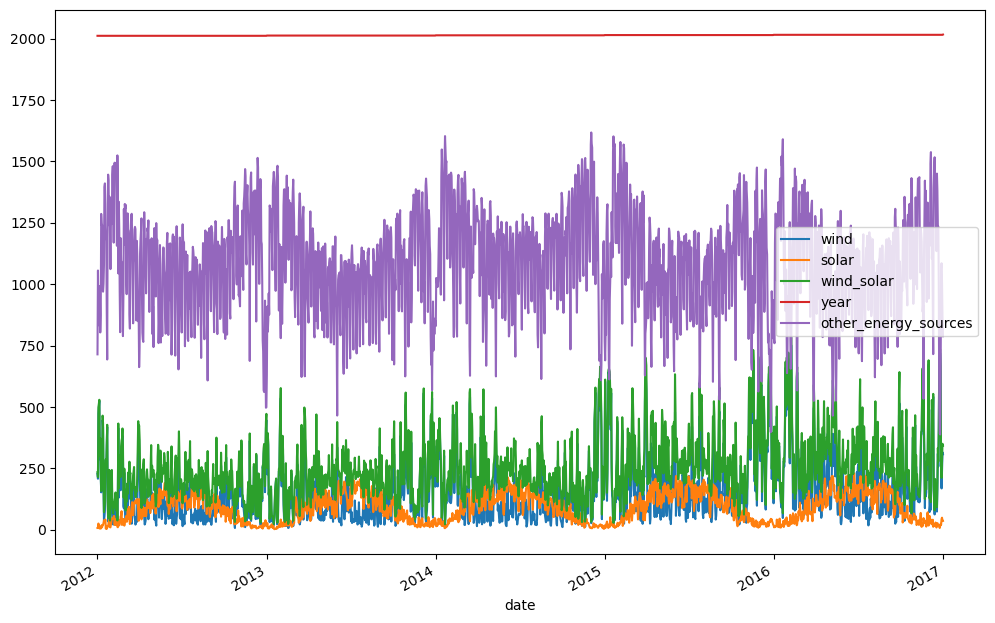

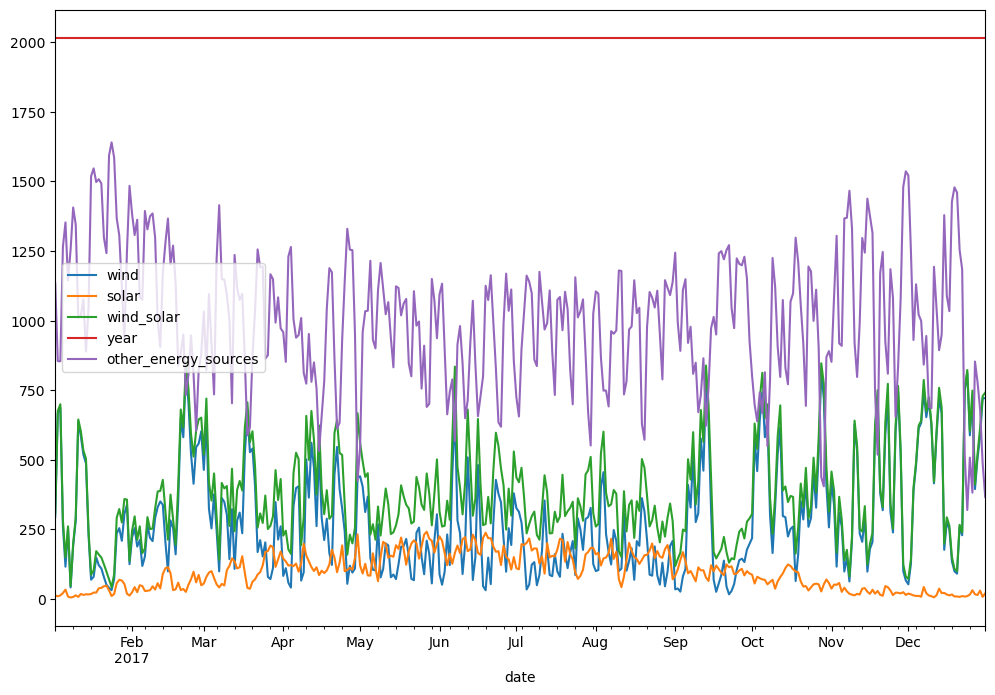

In [30]:
# graph the splits of X_train and X_test
X_train.groupby('date').mean().plot()
X_test.groupby('date').mean().plot()

plt.show()

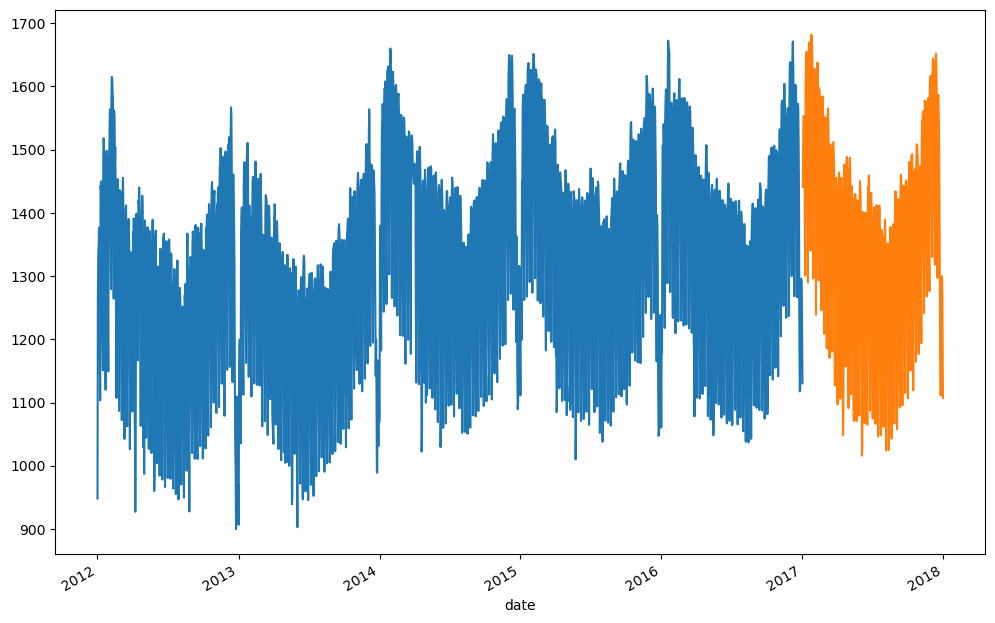

In [31]:
# graph the splits of y_train and y_test
y_train.groupby('date').mean().plot()
y_test.groupby('date').mean().plot()

plt.show()


# Target¶
- My target variable is consumption

In [32]:
y = y_train
y.head()

date
2012-01-01     948.128
2012-01-02    1269.581
2012-01-03    1334.745
2012-01-04    1347.136
2012-01-05    1376.658
Name: consumption, dtype: float64

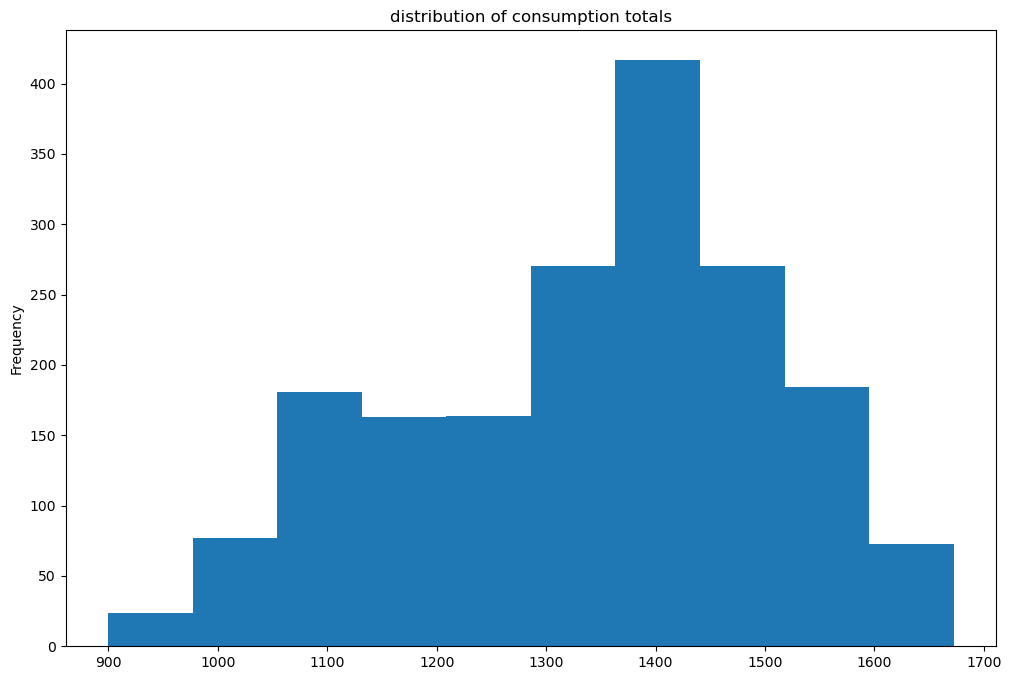

In [33]:
#Distribution of target
y.plot.hist()
plt.title('distribution of consumption totals')
plt.show()

# Seasonal Subseries Plot

In [34]:
# make my pivot table of years to month with unstack()
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
2012,1351.441226,1426.666241,1294.748258,1264.427000,1239.388710,1222.315667,1212.953710,1208.466258,1254.097633,1299.330355,1358.505700,1271.769968
2013,1321.194935,1354.087429,1297.794172,1262.359967,1192.123032,1181.999000,1211.503484,1213.691355,1262.723900,1297.771387,1360.433367,1301.299645
2014,1483.261323,1496.465536,1429.479143,1357.582700,1332.490710,1303.712233,1348.810258,1274.170968,1347.642400,1377.754355,1432.526667,1412.856161
2015,1479.451968,1522.838964,1443.586774,1350.108400,1280.312677,1325.948067,1341.598968,1292.465581,1363.728767,1395.132194,1452.687033,1375.545516
2016,1462.199355,1484.005138,1431.122710,1364.843867,1300.866677,1332.434333,1304.165387,1293.600226,1334.100667,1367.085355,1478.750100,1440.551774
2017,1130.413000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


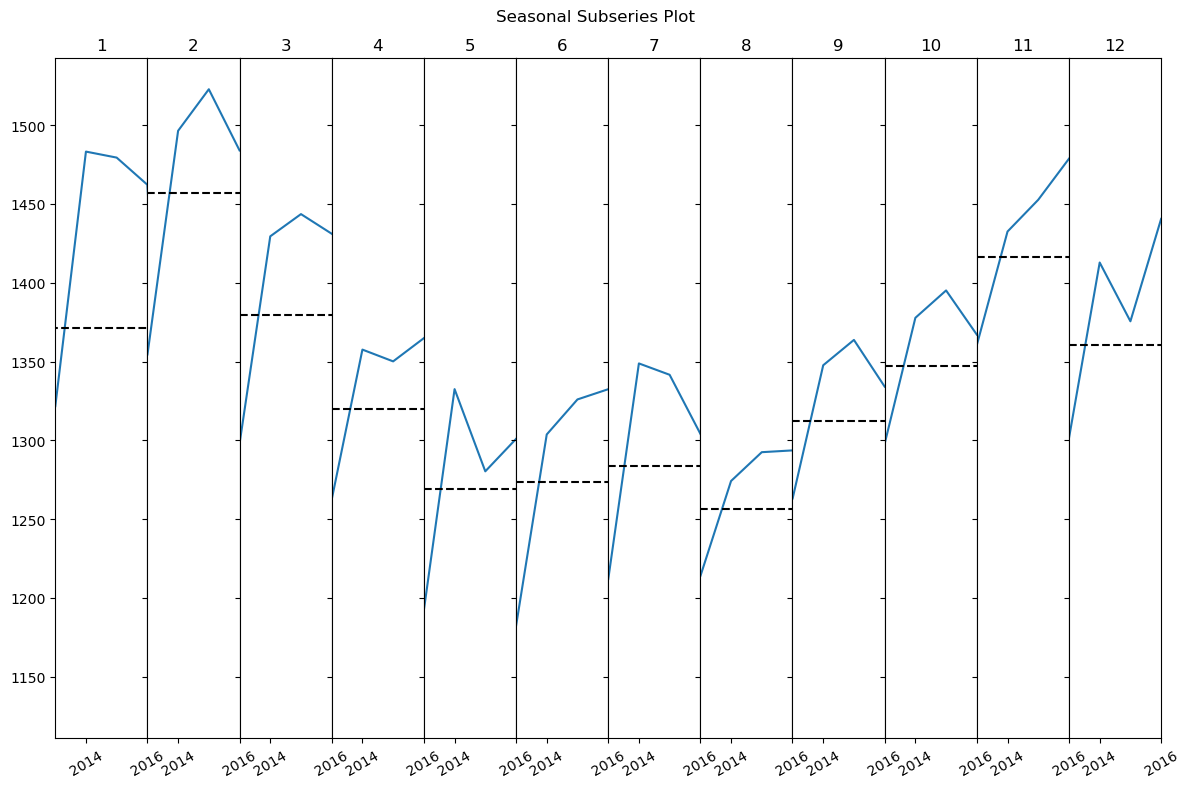

In [37]:
# unpacking my figure and axes elements
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)

# for ax, (month, subset) 
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set_xlim(2013, 2016)
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.tight_layout()
fig.subplots_adjust(wspace=0)

In [36]:
X_train

,wind,solar,wind_solar,month,year,other_energy_sources
date,,,,,,
2012-01-01,227.465,6.587,234.052,January,2012,714.076
2012-01-02,207.327,6.574,213.901,January,2012,1055.680
2012-01-03,473.468,24.679,498.147,January,2012,836.598
2012-01-04,499.804,14.681,514.485,January,2012,832.651
2012-01-05,523.851,5.071,528.922,January,2012,847.736
...,...,...,...,...,...,...
2016-12-28,214.990,19.450,234.440,December,2016,1060.441
2016-12-29,167.698,42.910,210.608,December,2016,1085.289
2016-12-30,239.257,48.546,287.803,December,2016,1003.241
